# Nonlinear least squares

In [10]:
using Plots, ForwardDiff, LinearAlgebra, Statistics, Random

In [38]:
function gn(r, A, x; maxits=10)
    xk = copy(x)
    for i = 1:maxits
        rk = r(xk)
        Ak = A(xk)
        bk = Ak*xk - rk
        println("norm(rk) = $(norm(rk))")
        xk = Ak\bk
    end
    return xk
end;

In [39]:
r(x) = [ ρ[i] - norm(x - b[:,i]) for i=1:m ]
A(x) = ForwardDiff.jacobian(r,x);

In [44]:
Random.seed!(0)
m = 10
b = randn(2,m)            # vector of beacon positions
xt = mean(b,dims=2)[:]          # define true x position as the mean
v = .5*randn(m)           # random error
ρ = [ norm(xt - b[:,i]) + v[i] for i=1:m];

In [45]:
x0 = rand(2)
x = gn(r, A, x0)

norm(rk) = 2.2039558927567353
norm(rk) = 1.2132458006907558
norm(rk) = 0.8658247489473625
norm(rk) = 0.8387544826935561
norm(rk) = 0.8350815128840761
norm(rk) = 0.8348189449107599
norm(rk) = 0.8348100189037863
norm(rk) = 0.8348096669892942
norm(rk) = 0.8348096530055291
norm(rk) = 0.8348096524493043


2-element Array{Float64,1}:
  0.0833564090452411 
 -0.02205062144156453

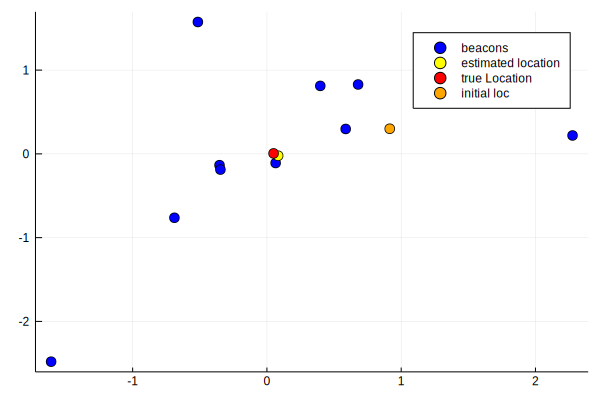

In [46]:
scatter(b[1,:],b[2,:],color="blue", label = "beacons", ms = 5)
scatter!([x[1]],[x[2]],color="yellow", label = "estimated location", ms = 5)
scatter!(xt[[1]],[xt[2]],color="red", label = "true Location", ms = 5)
scatter!(x0[[1]],[x0[2]],color="orange", label = "initial loc", ms = 5)